In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")

# --- Reading Train Dataset ---
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.texture_mean.describe()


count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(569, 32)


In [7]:
# Display data types of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavi

In [8]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


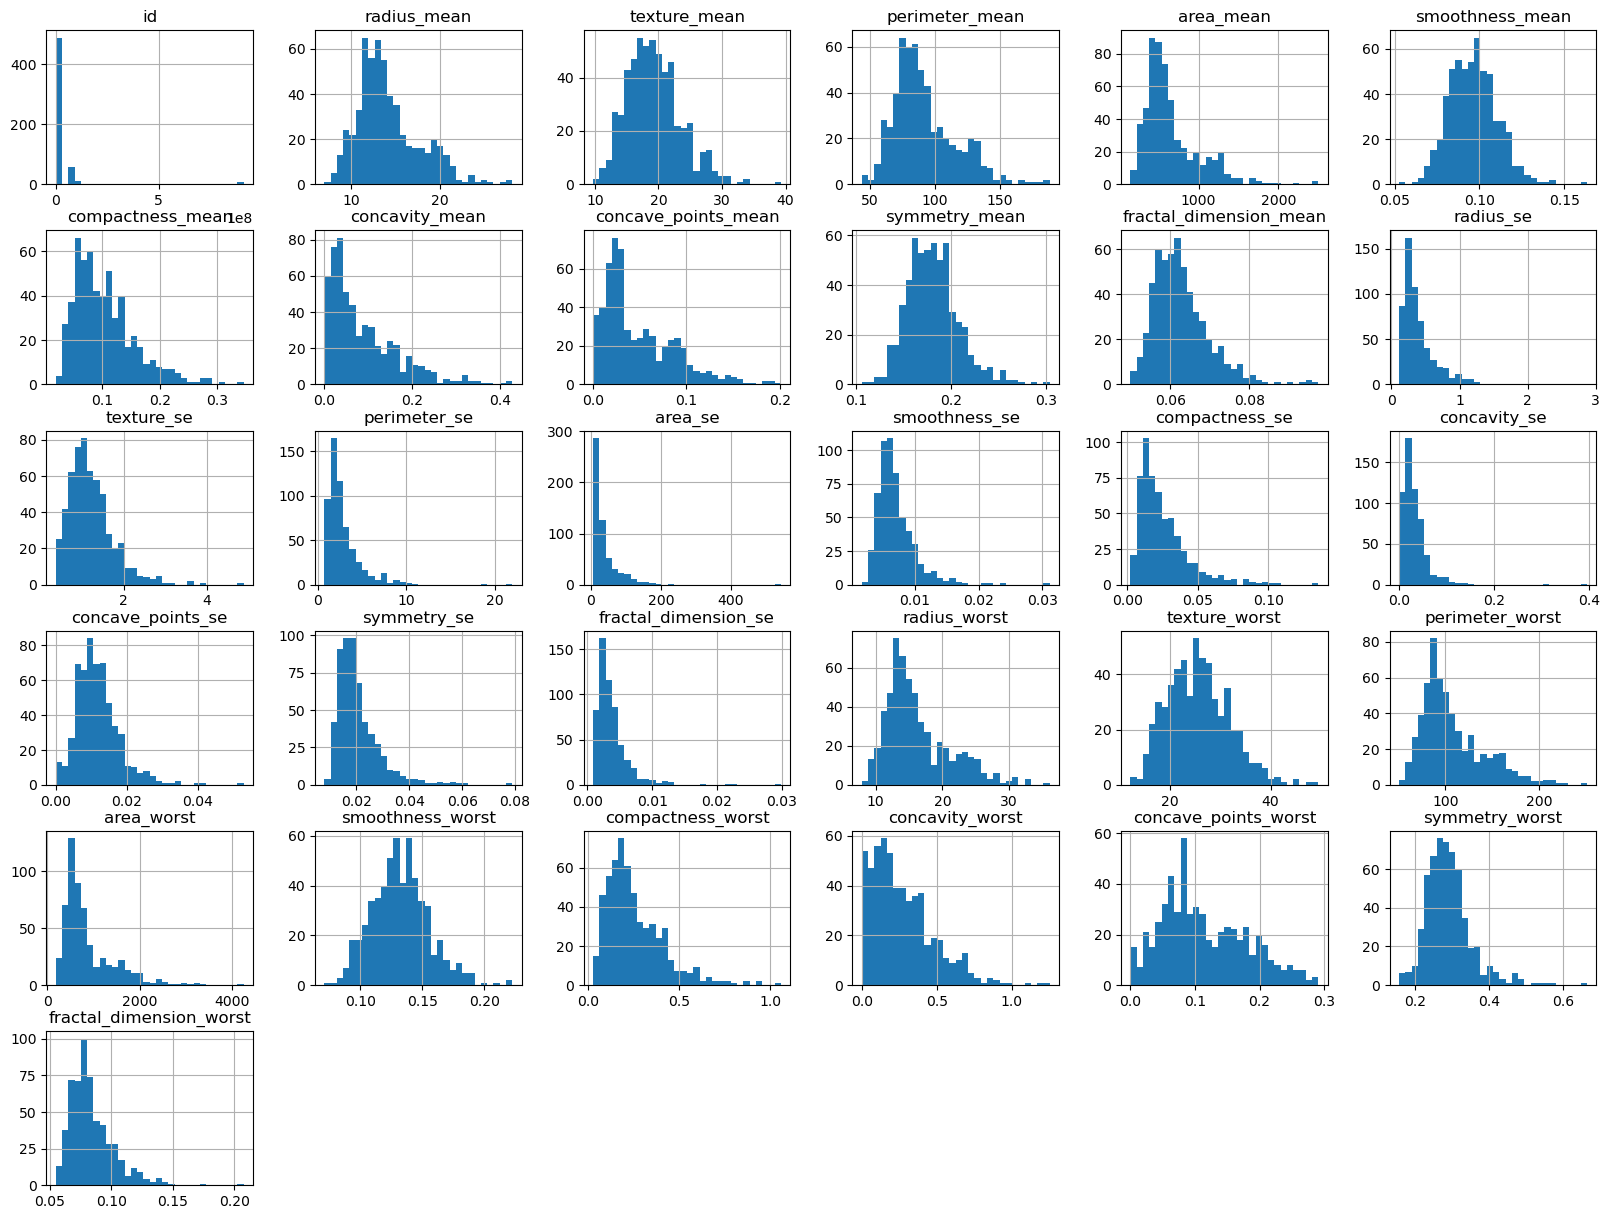

In [9]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

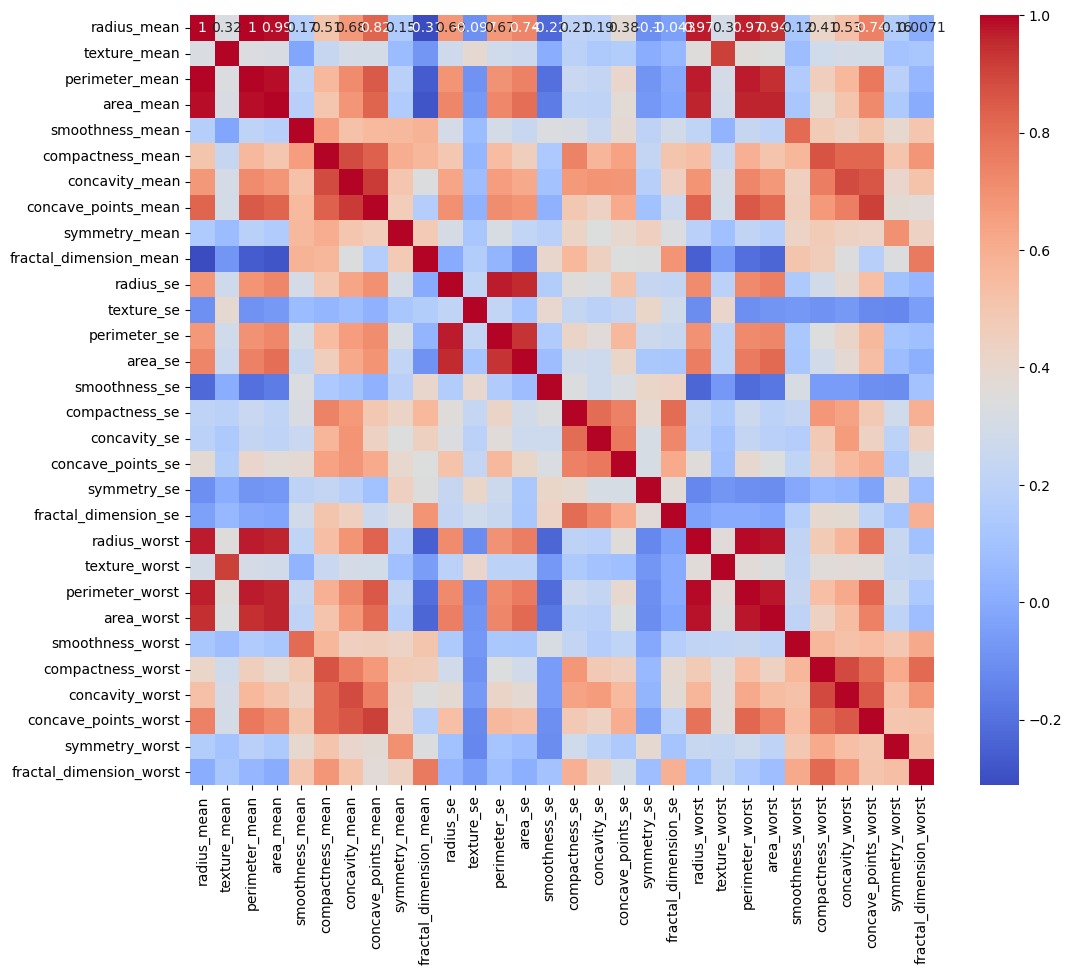

In [10]:
# Ensure all columns are numeric
numeric_df = df.drop(columns=['id', 'diagnosis'])

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Feature Engineering

Scaling Features:

In [11]:
from sklearn.preprocessing import StandardScaler

features = df.columns[2:]  # Excluding 'id' and 'diagnosis'
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [12]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [13]:
import numpy as np

corr_matrix = numeric_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Highly correlated features to consider dropping:", to_drop)



Highly correlated features to consider dropping: ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave_points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'fractal_dimension_worst']


In [14]:
# Drop highly correlated features
df_reduced = numeric_df.drop(columns=to_drop)

print("DataFrame after dropping highly correlated features:\n", df_reduced.head())


DataFrame after dropping highly correlated features:
    radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0         0.2419                 0.07871     1.0950      0.9053   
1         0.1812                 0.05667     0.5435      0.7339   
2         0.2069                 0.05999     0.7456      0.7869   
3         0.2597                 0.09744     0.4956      1.1560   
4         0.1809                 0.05883     0.7572      0.7813   

   smoothness_se  compactness_se  concave_points_se  symmetry_se  \
0       0.006399         0.04904            0.01587      0.03003   
1   

Model Building

Train/Test Split:

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Choosing a Model and Training:

Logistic Regression:


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Random Forest:


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.956140350877193
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [18]:
from sklearn.svm import SVC

# Create SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

# Evaluate SVM model
print("Support Vector Machine (SVM) Model:")
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_y_pred))


Support Vector Machine (SVM) Model:
Accuracy: 0.956140350877193
Confusion Matrix:
 [[68  3]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Evaluate Gradient Boosting Classifier model
print("Gradient Boosting Classifier Model:")
print("Accuracy:", accuracy_score(y_test, gb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_y_pred))
print("Classification Report:\n", classification_report(y_test, gb_y_pred))


Gradient Boosting Classifier Model:
Accuracy: 0.956140350877193
Confusion Matrix:
 [[69  2]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [20]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluate Decision Tree Classifier model
print("Decision Tree Classifier Model:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))



Decision Tree Classifier Model:
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[68  3]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

